🌳 Random Forest Results
Accuracy: 0.8061224489795918
[[222  25]
 [ 32  15]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       247
           1       0.38      0.32      0.34        47

    accuracy                           0.81       294
   macro avg       0.62      0.61      0.62       294
weighted avg       0.79      0.81      0.80       294

🚀 XGBoost Results
Accuracy: 0.8299319727891157
[[228  19]
 [ 31  16]]


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:29:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.88      0.92      0.90       247
           1       0.46      0.34      0.39        47

    accuracy                           0.83       294
   macro avg       0.67      0.63      0.65       294
weighted avg       0.81      0.83      0.82       294



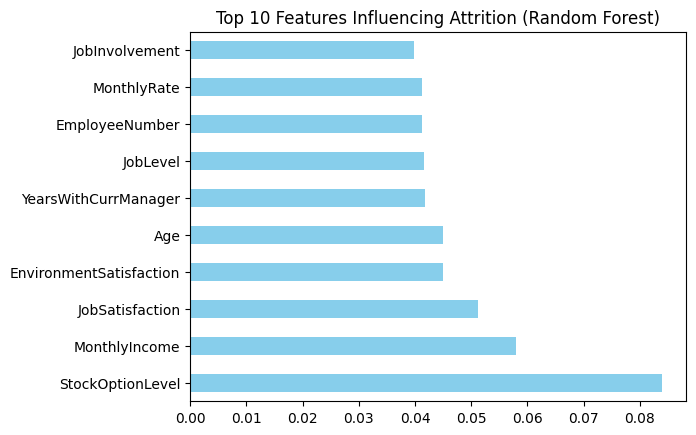

In [5]:
# Install XGBoost if not available
!pip install xgboost imbalanced-learn

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Step 1: Load Dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Features and Target
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Handle Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Step 3: Feature Scaling
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Step 4: Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_res, y_train_res)
y_pred_rf = rf_model.predict(X_test_scaled)

print("🌳 Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Step 5: XGBoost Classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train_res, y_train_res)
y_pred_xgb = xgb_model.predict(X_test_scaled)

print("🚀 XGBoost Results")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# Step 6: Feature Importance Plot (Random Forest)
feat_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh', color="skyblue")
plt.title("Top 10 Features Influencing Attrition (Random Forest)")
plt.show()
